In [65]:
import pandas as pd


file_path = r"C:\Users\teobl\Downloads\Curva de Rendimiento 31052024 (1).xlsx"
df = pd.read_excel(file_path, sheet_name=None)
print("Sheet names:", df.keys())

sheet_name = list(df.keys())[0]
df = df[sheet_name]



start_idx_dolares = df[df.iloc[:, 0] == 'No. Evento'].index[0] + 1
end_idx_dolares = df[df.iloc[:, 0] == 'QUETZALES'].index[0] - 2

dolares_df = df.iloc[start_idx_dolares:end_idx_dolares, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
dolares_df.columns = ['No. Evento', 'Instrumento', 'ISIN O NEMOTECNICO', 'CUPON %', 'FRECUENCIA', 'BASE DE CALCULO', 'Fecha Evento', 'Vencimiento', 'Plazo dias', 'Rendimiento']


rendimiento_dolares = dolares_df['Rendimiento']
plazo_dias_dolares = dolares_df['Plazo dias']

print("DOLARES - Rendimiento Data:")
print("\nDOLARES - Plazo Dias Data:")


#'QUETZALES'



start_idx_quetzales = df[df.iloc[:, 0] == 'QUETZALES'].index[0] + 3

# Extract relevant columns for 'QUETZALES'
quetzales_df = df.iloc[start_idx_quetzales:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
quetzales_df.columns = ['No. Evento', 'Instrumento', 'ISIN O NEMOTECNICO', 'CUPON %', 'FRECUENCIA', 'BASE DE CALCULO', 'Fecha Evento', 'Vencimiento Instrumento de Referencia', 'Plazo dias', 'Rendimiento']

# Extract 'Rendimiento' and 'Plazo dias' columns for 'QUETZALES'
rendimiento_quetzales = quetzales_df['Rendimiento']
plazo_dias_quetzales = quetzales_df['Plazo dias']

print("\nQUETZALES - Rendimiento Data:")
print("\nQUETZALES - Plazo Dias Data:")




Sheet names: dict_keys(['Curva de Rendimiento 31052024'])
DOLARES - Rendimiento Data:

DOLARES - Plazo Dias Data:

QUETZALES - Rendimiento Data:

QUETZALES - Plazo Dias Data:


In [66]:
rendimiento_data = rendimiento_quetzales.dropna().tolist()
plazo_dias_data = plazo_dias_quetzales.dropna().tolist()

rendimiento_data_q = [value for value in rendimiento_data if isinstance(value, (int, float))]
plazo_dias_data_q = [value for value in plazo_dias_data if isinstance(value, (int, float))]


# Print the extracted data
print("Rendimiento Quetzal:")
print(rendimiento_data_q)
print("\nPlazo Dias Quetzal:")
print(plazo_dias_data_q)

rendimiento_data = rendimiento_dolares.dropna().tolist()
plazo_dias_data = plazo_dias_dolares.dropna().tolist()

rendimiento_data_d = [value for value in rendimiento_data if isinstance(value, (int, float))]
plazo_dias_data_d = [value for value in plazo_dias_data if isinstance(value, (int, float))]

print("\nRendimiento Dolares:")
print(rendimiento_data_d)
print("\nPlazo Dias Dolares:")
print(plazo_dias_data_d)

Rendimiento Quetzal:
[4.65, 7.2309, 7.3173, 7.443, 7.54, 7.6619, 7.734, 7.848, 7.9256, 7.6275, 7.875, 8]

Plazo Dias Quetzal:
[1, 35, 98, 210, 287, 378, 462, 567, 644, 2093, 5354, 7334]

Rendimiento Dolares:
[6.308313, 6.315063, 6.370563, 6.472688, 6.528, 6.641063, 6.891375, 7.019]

Plazo Dias Dolares:
[694, 1086, 2845, 3005, 3368, 4334, 6248, 9362]


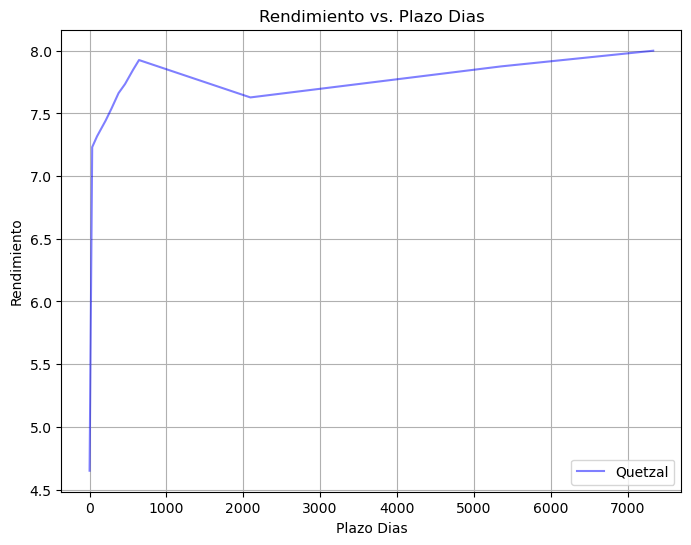

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Sort quetzal data based on plazo_dias
quetzal_sorted = sorted(zip(plazo_dias_data_q, rendimiento_data_q))
plazo_dias_data_q_sorted, rendimiento_data_q_sorted = zip(*quetzal_sorted)

# Plot for quetzal
ax.plot(plazo_dias_data_q_sorted, rendimiento_data_q_sorted, color='blue', alpha=0.5, linestyle='-', label='Quetzal')

# Sort dollar data based on plazo_dias
dollar_sorted = sorted(zip(plazo_dias_data_d, rendimiento_data_d))
plazo_dias_data_d_sorted, rendimiento_data_d_sorted = zip(*dollar_sorted)

# Plot for dollar
#ax.plot(plazo_dias_data_d_sorted, rendimiento_data_d_sorted, color='red', alpha=0.5, linestyle='-', label='Dollars')

# Set labels and title
ax.set_title('Rendimiento vs. Plazo Dias')
ax.set_xlabel('Plazo Dias')
ax.set_ylabel('Rendimiento')

# Show legend
ax.legend()

# Show grid
ax.grid(True)

# Show plot
plt.show()


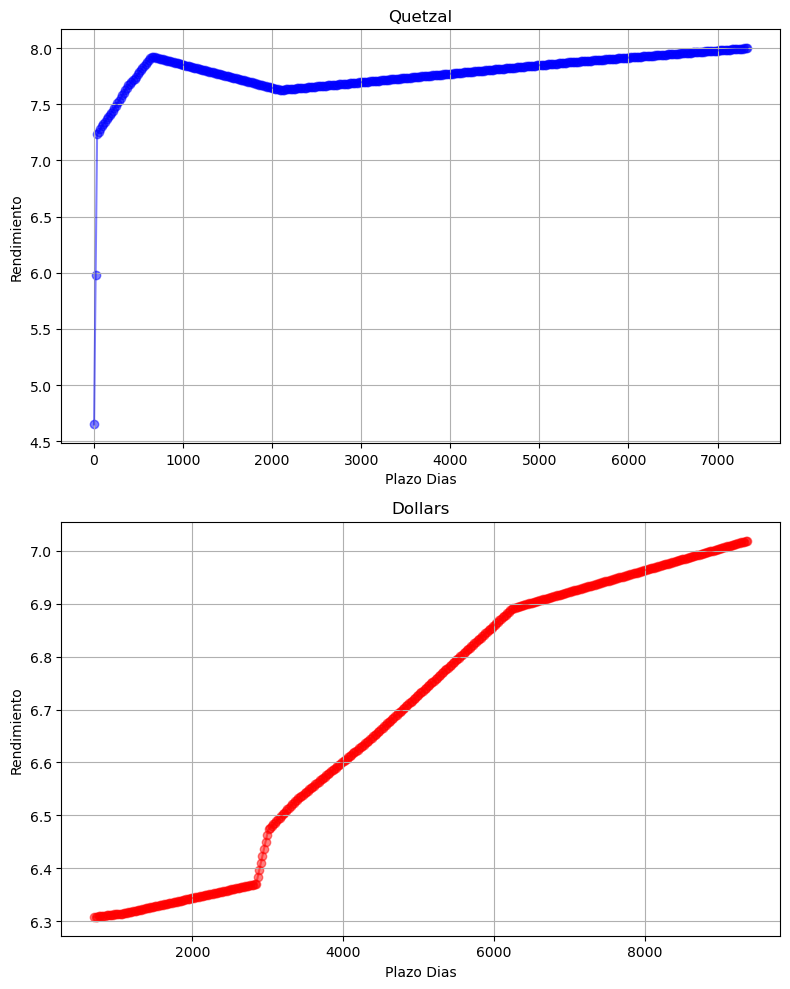

In [67]:
import numpy as np

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot for quetzal
quetzal_interp_x = np.linspace(min(plazo_dias_data_q_sorted), max(plazo_dias_data_q_sorted), 420)
quetzal_interp_y = np.interp(quetzal_interp_x, plazo_dias_data_q_sorted, rendimiento_data_q_sorted)
axs[0].scatter(quetzal_interp_x, quetzal_interp_y, color='blue', alpha=0.5, label='Interpolated')
axs[0].plot(plazo_dias_data_q_sorted, rendimiento_data_q_sorted, color='blue', alpha=0.5, linestyle='-')
axs[0].set_title('Quetzal')
axs[0].set_xlabel('Plazo Dias')
axs[0].set_ylabel('Rendimiento')
axs[0].grid(True)

# Plot for dollar
dollar_interp_x = np.linspace(min(plazo_dias_data_d_sorted), max(plazo_dias_data_d_sorted), 420)
dollar_interp_y = np.interp(dollar_interp_x, plazo_dias_data_d_sorted, rendimiento_data_d_sorted)
axs[1].scatter(dollar_interp_x, dollar_interp_y, color='red', alpha=0.5, label='Interpolated')
axs[1].plot(plazo_dias_data_d_sorted, rendimiento_data_d_sorted, color='red', alpha=0.5, linestyle='-')
axs[1].set_title('Dollars')
axs[1].set_xlabel('Plazo Dias')
axs[1].set_ylabel('Rendimiento')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


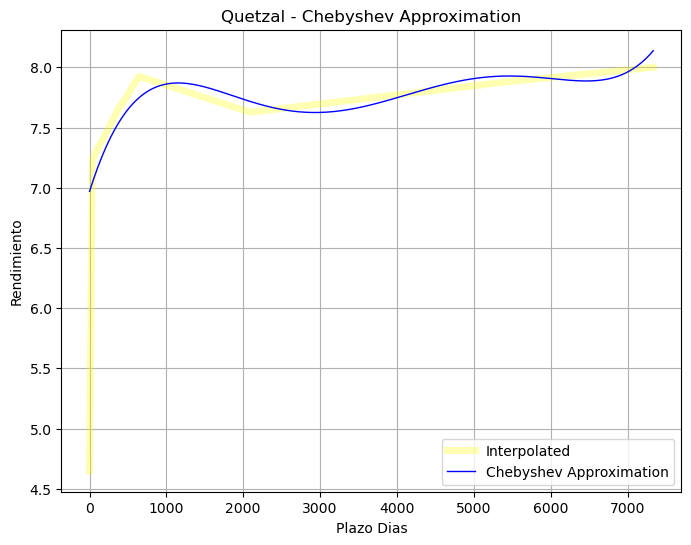

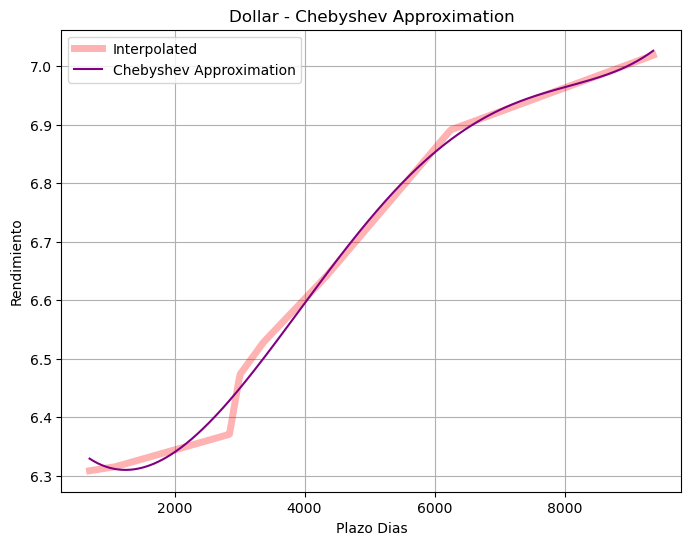

Quetzal Chebyshev Approximation:
7.7510214 + 0.30032653 T_1(x) - 0.06753796 T_2(x) + 0.14217044 T_3(x) -
0.12917334 T_4(x) + 0.14130614 T_5(x)

Dollar Chebyshev Approximation:
6.68107794 + 0.39715326 T_1(x) - 0.03208478 T_2(x) - 0.05188653 T_3(x) +
0.02886775 T_4(x) + 0.0035881 T_5(x)

Mean Squared Error for Quetzal Chebyshev Approximation:  0.02000314169524319
Mean Squared Error for Dollar Chebyshev Approximation:  0.0001958441355249151


In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming quetzal_interp_x, quetzal_interp_y, dollar_interp_x, dollar_interp_y are defined

# Define the number of Chebyshev coefficients to use for approximation
degree = 5

# Fit Chebyshev polynomial to the Quetzal data
quetzal_cheb_fit = np.polynomial.Chebyshev.fit(quetzal_interp_x, quetzal_interp_y, degree)

# Fit Chebyshev polynomial to the Dollar data
dollar_cheb_fit = np.polynomial.Chebyshev.fit(dollar_interp_x, dollar_interp_y, degree)

# Generate the Chebyshev approximation curve for Quetzal
quetzal_cheb_curve = quetzal_cheb_fit(quetzal_interp_x) 

# Generate the Chebyshev approximation curve for Dollar
dollar_cheb_curve = dollar_cheb_fit(dollar_interp_x)

# Plot the data and Chebyshev approximation curve for Quetzal
plt.figure(figsize=(8, 6))
plt.plot(quetzal_interp_x, quetzal_interp_y, color='yellow', alpha=0.3, label='Interpolated', linewidth= 5)
plt.plot(quetzal_interp_x, quetzal_cheb_curve, color='blue', linestyle='-', label='Chebyshev Approximation', linewidth=1)  # Adjust linewidth here
plt.title('Quetzal - Chebyshev Approximation')
plt.xlabel('Plazo Dias')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()


# Plot the data and Chebyshev approximation curve for Dollar
plt.figure(figsize=(8, 6))
plt.plot(dollar_interp_x, dollar_interp_y, color='red', alpha=0.3, label='Interpolated', linewidth= 5)
plt.plot(dollar_interp_x, dollar_cheb_curve, color='purple', linestyle='-', label='Chebyshev Approximation')
plt.title('Dollar - Chebyshev Approximation')
plt.xlabel('Plazo Dias')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()

quetzal_errors = (quetzal_interp_y - quetzal_cheb_curve) ** 2
quetzal_mean_squared_error = np.mean(quetzal_errors)

# Calculate the mean squared error between the linear plot and the Chebyshev approximation curve for Dollar
dollar_errors = (dollar_interp_y - dollar_cheb_curve) ** 2
dollar_mean_squared_error = np.mean(dollar_errors)


# Print the equations of the Chebyshev approximation curves
print("Quetzal Chebyshev Approximation:")
print(quetzal_cheb_fit)
print("\nDollar Chebyshev Approximation:")
print(dollar_cheb_fit)


# Print the mean squared errors
print("\nMean Squared Error for Quetzal Chebyshev Approximation: ", quetzal_mean_squared_error)
print("Mean Squared Error for Dollar Chebyshev Approximation: ", dollar_mean_squared_error)


In [23]:
# Calculate the mean squared error for the 12 values in rendimiento_data_q_sorted and their respective values in quetzal_cheb_curve
quetzal_mse = ((rendimiento_data_q_sorted - quetzal_cheb_curve[:12]) ** 2).mean()

# Print the mean squared error
print("Mean Squared Error for Quetzal Chebyshev Approximation: ", quetzal_mse)



Mean Squared Error for Quetzal Chebyshev Approximation:  0.693674663828276


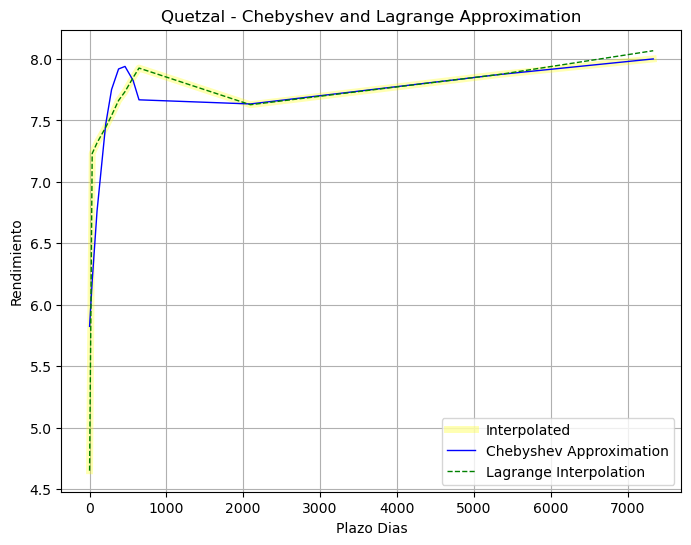

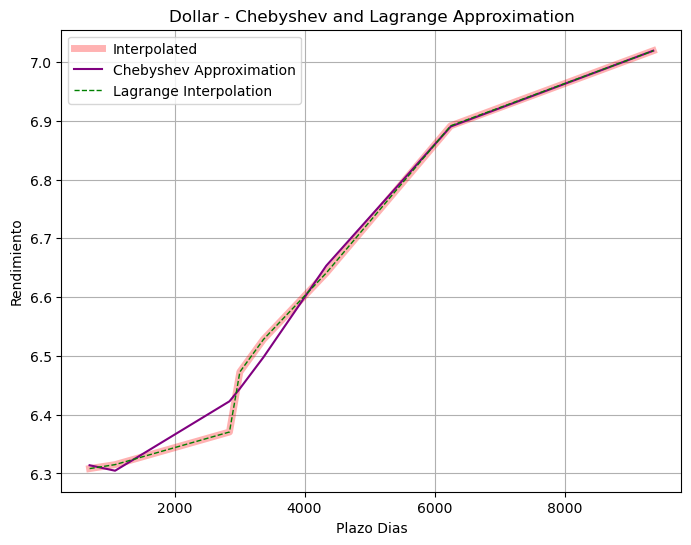

Quetzal Chebyshev Approximation:
6.01766131 - 5.3716296 T_1(x) - 7.11541856 T_2(x) + 0.90141646 T_3(x) +
8.00996945 T_4(x) + 5.55804499 T_5(x)

Dollar Chebyshev Approximation:
6.67352105 + 0.38965662 T_1(x) - 0.04632183 T_2(x) - 0.05060993 T_3(x) +
0.03932578 T_4(x) + 0.01347685 T_5(x)

Quetzal Lagrange Approximation:
           11            10             9             8            7
2.551e-30 x  - 4.45e-26 x  + 2.759e-22 x - 7.723e-19 x + 1.12e-15 x
              6             5             4             3            2
 - 9.321e-13 x + 4.702e-10 x - 1.459e-07 x + 2.732e-05 x - 0.002894 x + 0.1514 x + 4.501

Dollar Lagrange Approximation:
           7             6             5             4            3
7.408e-24 x - 2.084e-19 x + 2.311e-15 x - 1.302e-11 x + 3.98e-08 x
              2
 - 6.476e-05 x + 0.05049 x - 8.176

Mean Squared Error for Quetzal Chebyshev Approximation:  0.24888132282997336
Mean Squared Error for Dollar Chebyshev Approximation:  0.0005914743270290269

Mean Squ

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Assuming plazo_dias_data_q, rendimiento_data_q, plazo_dias_data_d, rendimiento_data_d are defined

# Define the number of Chebyshev coefficients to use for approximation
degree = 5

# Sort quetzal data based on plazo_dias
quetzal_sorted = sorted(zip(plazo_dias_data_q, rendimiento_data_q))
plazo_dias_data_q_sorted, rendimiento_data_q_sorted = zip(*quetzal_sorted)
plazo_dias_data_q_sorted = np.array(plazo_dias_data_q_sorted)
rendimiento_data_q_sorted = np.array(rendimiento_data_q_sorted)

# Sort dollar data based on plazo_dias
dollar_sorted = sorted(zip(plazo_dias_data_d, rendimiento_data_d))
plazo_dias_data_d_sorted, rendimiento_data_d_sorted = zip(*dollar_sorted)
plazo_dias_data_d_sorted = np.array(plazo_dias_data_d_sorted)
rendimiento_data_d_sorted = np.array(rendimiento_data_d_sorted)

# Fit Chebyshev polynomial to the Quetzal data
quetzal_cheb_fit = np.polynomial.Chebyshev.fit(plazo_dias_data_q_sorted, rendimiento_data_q_sorted, degree)

# Fit Chebyshev polynomial to the Dollar data
dollar_cheb_fit = np.polynomial.Chebyshev.fit(plazo_dias_data_d_sorted, rendimiento_data_d_sorted, degree)

# Generate the Chebyshev approximation curve for Quetzal
quetzal_cheb_curve = quetzal_cheb_fit(plazo_dias_data_q_sorted) 

# Generate the Chebyshev approximation curve for Dollar
dollar_cheb_curve = dollar_cheb_fit(plazo_dias_data_d_sorted)

# Perform Lagrange interpolation for the specific points
lagrange_quetzal = lagrange(plazo_dias_data_q_sorted, rendimiento_data_q_sorted)
lagrange_dollar = lagrange(plazo_dias_data_d_sorted, rendimiento_data_d_sorted)

# Generate the Lagrange interpolation curve for Quetzal
quetzal_lagrange_curve = lagrange_quetzal(plazo_dias_data_q_sorted)

# Generate the Lagrange interpolation curve for Dollar
dollar_lagrange_curve = lagrange_dollar(plazo_dias_data_d_sorted)

# Plot the data and Chebyshev approximation curve for Quetzal
plt.figure(figsize=(8, 6))
plt.plot(plazo_dias_data_q_sorted, rendimiento_data_q_sorted, color='yellow', alpha=0.3, label='Interpolated', linewidth=5)
plt.plot(plazo_dias_data_q_sorted, quetzal_cheb_curve, color='blue', linestyle='-', label='Chebyshev Approximation', linewidth=1)
plt.plot(plazo_dias_data_q_sorted, quetzal_lagrange_curve, color='green', linestyle='--', label='Lagrange Interpolation', linewidth=1)
plt.title('Quetzal - Chebyshev and Lagrange Approximation')
plt.xlabel('Plazo Dias')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()

# Plot the data and Chebyshev approximation curve for Dollar
plt.figure(figsize=(8, 6))
plt.plot(plazo_dias_data_d_sorted, rendimiento_data_d_sorted, color='red', alpha=0.3, label='Interpolated', linewidth=5)
plt.plot(plazo_dias_data_d_sorted, dollar_cheb_curve, color='purple', linestyle='-', label='Chebyshev Approximation')
plt.plot(plazo_dias_data_d_sorted, dollar_lagrange_curve, color='green', linestyle='--', label='Lagrange Interpolation', linewidth=1)
plt.title('Dollar - Chebyshev and Lagrange Approximation')
plt.xlabel('Plazo Dias')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean squared error for Chebyshev and Lagrange curves for Quetzal
quetzal_cheb_errors = (rendimiento_data_q_sorted - quetzal_cheb_curve) ** 2
quetzal_cheb_mse = np.mean(quetzal_cheb_errors)

quetzal_lagrange_errors = (rendimiento_data_q_sorted - quetzal_lagrange_curve) ** 2
quetzal_lagrange_mse = np.mean(quetzal_lagrange_errors)

# Calculate the mean squared error for Chebyshev and Lagrange curves for Dollar
dollar_cheb_errors = (rendimiento_data_d_sorted - dollar_cheb_curve) ** 2
dollar_cheb_mse = np.mean(dollar_cheb_errors)

dollar_lagrange_errors = (rendimiento_data_d_sorted - dollar_lagrange_curve) ** 2
dollar_lagrange_mse = np.mean(dollar_lagrange_errors)

# Print the equations of the Chebyshev and Lagrange approximation curves
print("Quetzal Chebyshev Approximation:")
print(quetzal_cheb_fit)
print("\nDollar Chebyshev Approximation:")
print(dollar_cheb_fit)

print("\nQuetzal Lagrange Approximation:")
print(lagrange_quetzal)
print("\nDollar Lagrange Approximation:")
print(lagrange_dollar)

# Print the mean squared errors
print("\nMean Squared Error for Quetzal Chebyshev Approximation: ", quetzal_cheb_mse)
print("Mean Squared Error for Dollar Chebyshev Approximation: ", dollar_cheb_mse)

print("\nMean Squared Error for Quetzal Lagrange Approximation: ", quetzal_lagrange_mse)
print("Mean Squared Error for Dollar Lagrange Approximation: ", dollar_lagrange_mse)


[2.73972603e-03 9.58904110e-02 2.68493151e-01 5.75342466e-01
 7.86301370e-01 1.03561644e+00 1.26575342e+00 1.55342466e+00
 1.76438356e+00 5.73424658e+00 1.46684932e+01 2.00931507e+01]


C:\Users\teobl\AppData\Local\Temp\ipykernel_17864\1251325314.py:11: RuntimeWarning: overflow encountered in exp
  term3 = (1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)
C:\Users\teobl\AppData\Local\Temp\ipykernel_17864\1251325314.py:11: RuntimeWarning: invalid value encountered in subtract
  term3 = (1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)
C:\Users\teobl\AppData\Local\Temp\ipykernel_17864\1251325314.py:9: RuntimeWarning: invalid value encountered in divide
  term1 = (1 - np.exp(-lambda1 * tau)) / (lambda1 * tau)
C:\Users\teobl\AppData\Local\Temp\ipykernel_17864\1251325314.py:11: RuntimeWarning: invalid value encountered in divide
  term3 = (1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)


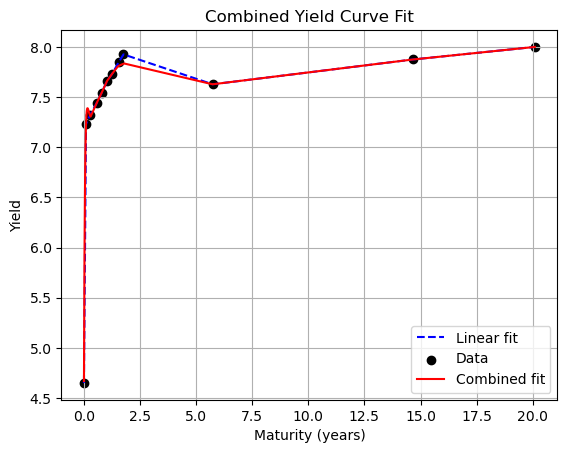

Estimated parameters: beta0=7.856844811667031, beta1=-3.3960297892818443, beta2=2.482517506367004, beta3=7.322324717381399, lambda1=2.3146225321095417, lambda2=17.529304915422024


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from numpy.polynomial import Chebyshev

# Define the Svensson function
def svensson(tau, beta0, beta1, beta2, beta3, lambda1, lambda2):
    term1 = (1 - np.exp(-lambda1 * tau)) / (lambda1 * tau)
    term2 = term1 - np.exp(-lambda1 * tau)
    term3 = (1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)
    return beta0 + beta1 * term1 + beta2 * term2 + beta3 * term3

# Provided data
yields = np.array([4.65, 7.2309, 7.3173, 7.443, 7.54, 7.6619, 7.734, 7.848, 7.9256, 7.6275, 7.875, 8]) 
maturities = np.array([1, 35, 98, 210, 287, 378, 462, 567, 644, 2093, 5354, 7334]) / 365
print(maturities)

# Determine the density threshold and interval width
density_threshold = 2  # Define as needed
interval_width = 0.3  # 1 year intervals

# Calculate densities
intervals = np.arange(0, np.max(maturities) + interval_width, interval_width)
densities = np.histogram(maturities, bins=intervals)[0]

# Fit the Svensson model to the data
initial_guess = [1, -1, 1, 1, 0.1, 0.1]
params, _ = curve_fit(svensson, maturities, yields, p0=initial_guess, maxfev=10000) 

# Create the combined curve
combined_yields = []
combined_maturities = []

for i in range(len(intervals) - 1):
    start = intervals[i]
    end = intervals[i + 1]
    mask = (maturities >= start) & (maturities < end)
    
    if np.sum(mask) >= density_threshold:
        # Use Svensson model
        tau = np.linspace(start, end, 100)
        combined_yields.extend(svensson(tau, *params))
        combined_maturities.extend(tau)
    else:
        # Use Cubic Spline approximation
        if np.sum(mask) > 1:  # At least 2 points needed for Chebyshev fit
            cs = CubicSpline(maturities[mask], yields[mask])
            tau = np.linspace(start, end, 100)
            combined_yields.extend(cs(tau))
            combined_maturities.extend(tau)
        else:
            # If there's only one point, just use its yield
            combined_yields.extend(yields[mask])
            combined_maturities.extend(maturities[mask])


# Plot linear interpolation between all points
plt.plot(maturities, yields, label='Linear fit', color='blue', linestyle='--')


# Plot the results
plt.scatter(maturities, yields, label='Data', color='black')
plt.plot(combined_maturities, combined_yields, label='Combined fit', color='red')

plt.xlabel('Maturity (years)')
plt.ylabel('Yield')
plt.title('Combined Yield Curve Fit')
plt.legend()
plt.grid(True)
plt.show()

# Output the estimated parameters
beta0, beta1, beta2, beta3, lambda1, lambda2 = params
print(f"Estimated parameters: beta0={beta0}, beta1={beta1}, beta2={beta2}, beta3={beta3}, lambda1={lambda1}, lambda2={lambda2}")


In [66]:
# Calculate the linear interpolation curve
linear_interp_yields = np.interp(maturities, combined_maturities, combined_yields)

# Calculate the squared differences
squared_diff = (linear_interp_yields - yields) ** 2

# Remove any NaN or infinity values
squared_diff = squared_diff[~np.isnan(squared_diff) & ~np.isinf(squared_diff)]

# Calculate the mean squared error
mse = np.mean(squared_diff)

print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.0009265852197009778


C:\Users\teobl\AppData\Local\Temp\ipykernel_25108\4250343328.py:9: RuntimeWarning: overflow encountered in exp
  term3 = (1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)
C:\Users\teobl\AppData\Local\Temp\ipykernel_25108\4250343328.py:9: RuntimeWarning: invalid value encountered in subtract
  term3 = (1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)
C:\Users\teobl\AppData\Local\Temp\ipykernel_25108\4250343328.py:7: RuntimeWarning: overflow encountered in exp
  term1 = (1 - np.exp(-lambda1 * tau)) / (lambda1 * tau)
C:\Users\teobl\AppData\Local\Temp\ipykernel_25108\4250343328.py:8: RuntimeWarning: overflow encountered in exp
  term2 = term1 - np.exp(-lambda1 * tau)
C:\Users\teobl\AppData\Local\Temp\ipykernel_25108\4250343328.py:8: RuntimeWarning: invalid value encountered in subtract
  term2 = term1 - np.exp(-lambda1 * tau)


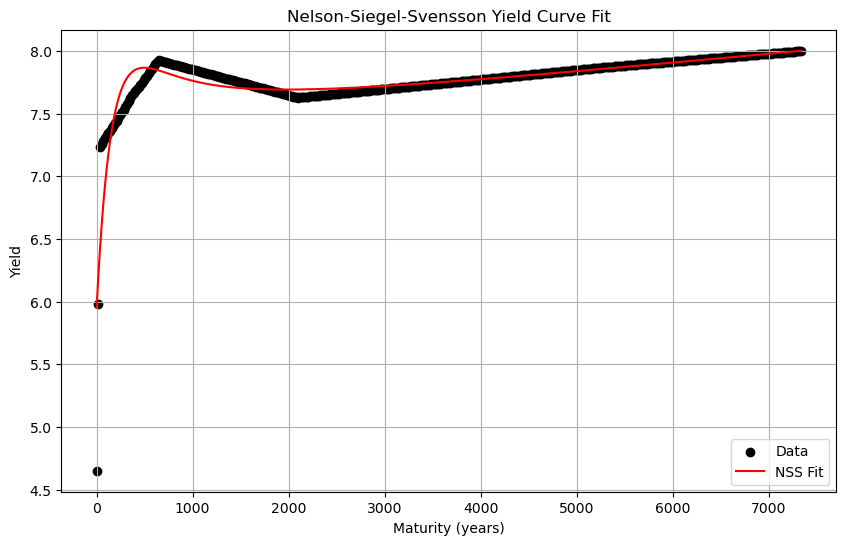

Estimated parameters: beta0=7.3639289204352885, beta1=-1.4247078099149557, beta2=3.419643113457599, beta3=18.2394926638072, lambda1=0.0062033835607216365, lambda2=9.302404278062163e-06


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the NSS (Svensson) function
def svensson(tau, beta0, beta1, beta2, beta3, lambda1, lambda2):
    term1 = (1 - np.exp(-lambda1 * tau)) / (lambda1 * tau)
    term2 = term1 - np.exp(-lambda1 * tau)
    term3 = (1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)
    return beta0 + beta1 * term1 + beta2 * term2 + beta3 * term3

# Provided data
yields = quetzal_interp_y
maturities = quetzal_interp_x

# Fit the Svensson model to the data
initial_guess = [1, -1, 1, 1, 0.1, 0.1]
params, _ = curve_fit(svensson, maturities, yields, p0=initial_guess, maxfev=10000) 

# Generate the fitted curve using the estimated parameters
fitted_yields = svensson(maturities, *params)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(maturities, yields, label='Data', color='black')
plt.plot(maturities, fitted_yields, label='NSS Fit', color='red')

plt.xlabel('Maturity (years)')
plt.ylabel('Yield')
plt.title('Nelson-Siegel-Svensson Yield Curve Fit')
plt.legend()
plt.grid(True)
plt.show()

# Output the estimated parameters
beta0, beta1, beta2, beta3, lambda1, lambda2 = params
print(f"Estimated parameters: beta0={beta0}, beta1={beta1}, beta2={beta2}, beta3={beta3}, lambda1={lambda1}, lambda2={lambda2}")


In [11]:
import tensorflow as tf
print(tf.__version__)



2.16.1


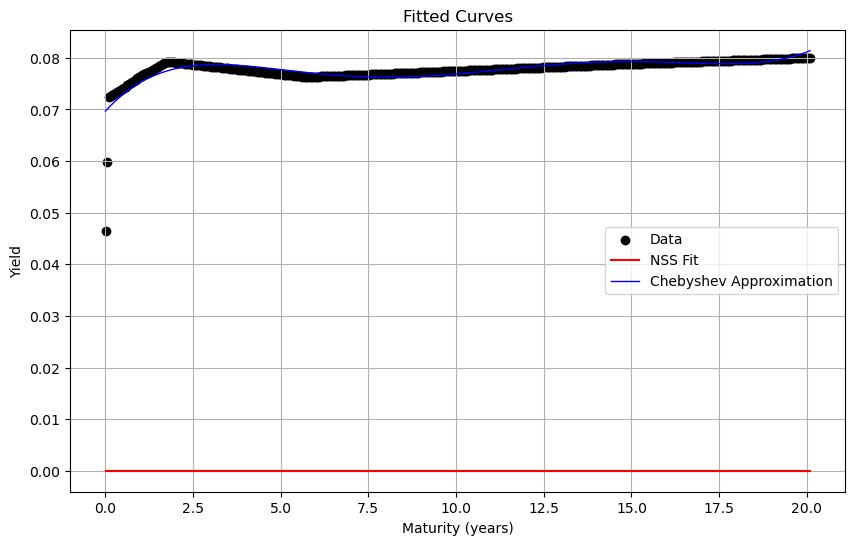

C:\Users\teobl\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


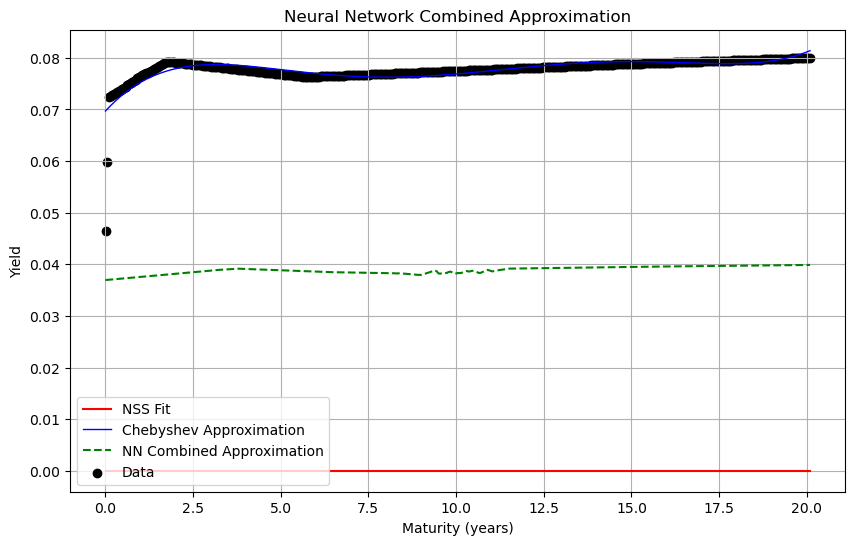

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
np.random.seed(0)
# Provided data
yields = quetzal_interp_y / 100
maturities = quetzal_interp_x / 365

# Predefined NSS fit and Chebyshev approximation (assume these are provided)
fitted_yields = fitted_yields / 100
cheb_curve = quetzal_cheb_curve / 100

# Sort the data by maturity
sorted_indices = np.argsort(maturities)
maturities_sorted = maturities[sorted_indices]
yields_sorted = yields[sorted_indices]
fitted_yields_sorted = fitted_yields[sorted_indices]
cheb_curve_sorted = cheb_curve[sorted_indices]

# Combine the fitted yields and Chebyshev curve into a single dataset
combined_yields = (fitted_yields_sorted + cheb_curve_sorted) / 2

# Generate cubic spline interpolation for the combined fit
cs_combined = CubicSpline(maturities_sorted, yields_sorted)
maturities_combined_fine = np.linspace(maturities_sorted.min(), maturities_sorted.max(), 500)
yields_combined_fine = cs_combined(maturities_combined_fine)

# Plot the original data and fits
plt.figure(figsize=(10, 6))
plt.scatter(maturities_sorted, yields_sorted, label='Data', color='black')
plt.plot(maturities_sorted, fitted_yields_sorted, label='NSS Fit', color='red')
plt.plot(maturities_sorted, cheb_curve_sorted, color='blue', linestyle='-', label='Chebyshev Approximation', linewidth=1)
plt.xlabel('Maturity (years)')
plt.ylabel('Yield')
plt.title('Fitted Curves')
plt.legend()
plt.grid(True)
plt.show()

# Normalize the data
scaler = StandardScaler()
maturities_scaled = scaler.fit_transform(maturities_sorted.reshape(-1, 1))

# Define the neural network model
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=[1]),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare data for the neural network
x_combined = maturities_scaled
y_combined = combined_yields.reshape(-1, 1)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model for the combined fit
model_combined = build_model()
history_combined = model_combined.fit(x_combined, y_combined, epochs=500, verbose=0, callbacks=[early_stopping])

# Generate predictions
y_combined_pred = model_combined.predict(x_combined)

# Inverse transform the maturities back to original scale
maturities_inv = scaler.inverse_transform(maturities_scaled)

# Plot the original and neural network approximations
plt.figure(figsize=(10, 6))
plt.plot(maturities_inv, fitted_yields_sorted, label='NSS Fit', color='red')
plt.plot(maturities_inv, cheb_curve_sorted, color='blue', linestyle='-', label='Chebyshev Approximation', linewidth=1)
plt.plot(maturities_inv, y_combined_pred, label='NN Combined Approximation', color='green', linestyle='--')
plt.scatter(maturities_sorted, yields_sorted, label='Data', color='black')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield')
plt.title('Neural Network Combined Approximation')
plt.legend()
plt.grid(True)
plt.show()
